  # Computational Statistics Homework 02
    Kalin Gibbons
    2020-01-30

  ## Problem 1

 ---

 Write a Python script that implements the Newton's method in Example 2.2 on
 page 27 and produces Figure 2.3 of the *Computational Statistics* book.

 ### Example 2.2

 (A Simple Univariate Optimization, Continued) Figure 2.3 illustrates the
 first several iterations of Newton's method applied to the simple function in
 (2.2)

 The Newton increment for this problem is given by

 $$h^{(t)} = \frac{(x^{(t)} + 1) (1 + 1/x^{(t)} - \log x^{(t)})} {3 +
 4/x^{(t)} + 1/(x^{(t)})^2 - 2\log x^{(t)}}$$

 Starting from $x^{(0)} = 3.0$, Newton's method quickly finds $x^{(4)} \approx
 3.59112$. For comparison, the first five decimal places of $x^*$ are not
 correctly determined by the bisection method in Example 2.1 until iteration
 19.

 * Points: Need guesses from 0 thru 2, as well as $x^*$
 * Lines: $g'(x)$, dotted hline for zero, dashed tangent for $x^{(0)}$


 ### Import necessary packages


In [18]:
# Need plotting capability, and numpy for arrays
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (15, 7.5)
mpl.rcParams['mathtext.fontset'] = 'stix'


 ### Set up the derivative function and updating equation

 Our equations of interest are:

 1. Beginning with the generic updating equation for Newton's Method
 $$x{(t + 1)} = x^{(t)}
                - \frac{
                        g ^\prime (x^{(t)})
                       }
                       {
                        g^{\prime \prime} (x^{(t)})
                       }$$

 1. Leading to an updating equation of
 $$
 x^{(t + 1)} = x^{(t)} +
 \frac{
        (x^{(t)} + 1) (1 + 1 / x^{(t)} - \log x^{(t)})
      }
      {
        3 + 4 / x^{(t)} + 1 / (x^{(t)})^2 -2 \log x^{(t)}
      }
 $$

In [19]:
def get_refinement(x):
    """
    Calculates the refinement term of the Newton-Raphson iteration.
    
    Refinement is the negation of the ratio of the derivative to second 
    derivative, evaluated at the current point.
    """
    x = np.asarray(x)
    assert np.any(x != 0), "Divide by zero error."
    numerator = (x + 1) * (1 + 1 / x - np.log(x))
    denominator = 3 + 4 / x + 1 / x**2 - 2 * np.log(x)
    assert np.any(denominator != 0), "Divide by zero error."
    return numerator / denominator


def update_guess(x):
    """
    Calculates the new point by adding the refinement term.
    """
    return x + get_refinement(x)


def get_dydx(x):
    """
    Calculates the output of the derivative for a given input.
    """
    x = np.asarray(x)
    assert np.any(x != 0), "Divide by zero error."
    numerator = 1 + 1 / x - np.log(x)
    denominator = (1 + x)**2
    assert np.any(denominator != 0), "Divide by zero error."
    return numerator / denominator


def get_tangent_line(x, x_old, domain):
    x = np.asarray(x)
    x_old = np.asarray(x_old)
    domain = np.asarray(domain)
    assert x.size == 1, "x must be a scalar."
    assert x_old.size == 1, "x_old must be a scalar."
    assert x != x_old, "x cannot equal x_old"
    slope = (0 - get_dydx(x_old)) / (x - x_old)
    y = slope * (domain - x)
    return y


# Create an array of domain and range values, and the initial guess for the 
# root.
x = np.linspace(2, 5, int(1e3))
dydx = get_dydx(x)
x_init_guess = 3.0


 #### Find the optimal solution

 Multiple convergence criteria exist for stopping the root finding process. We will use the relative convergence criteria.

 $$
 \frac{
   |x^{(t + 1)} - x^{(t)}|
 }
 {
   |x^{(t)}|
 }
 < \epsilon
 $$

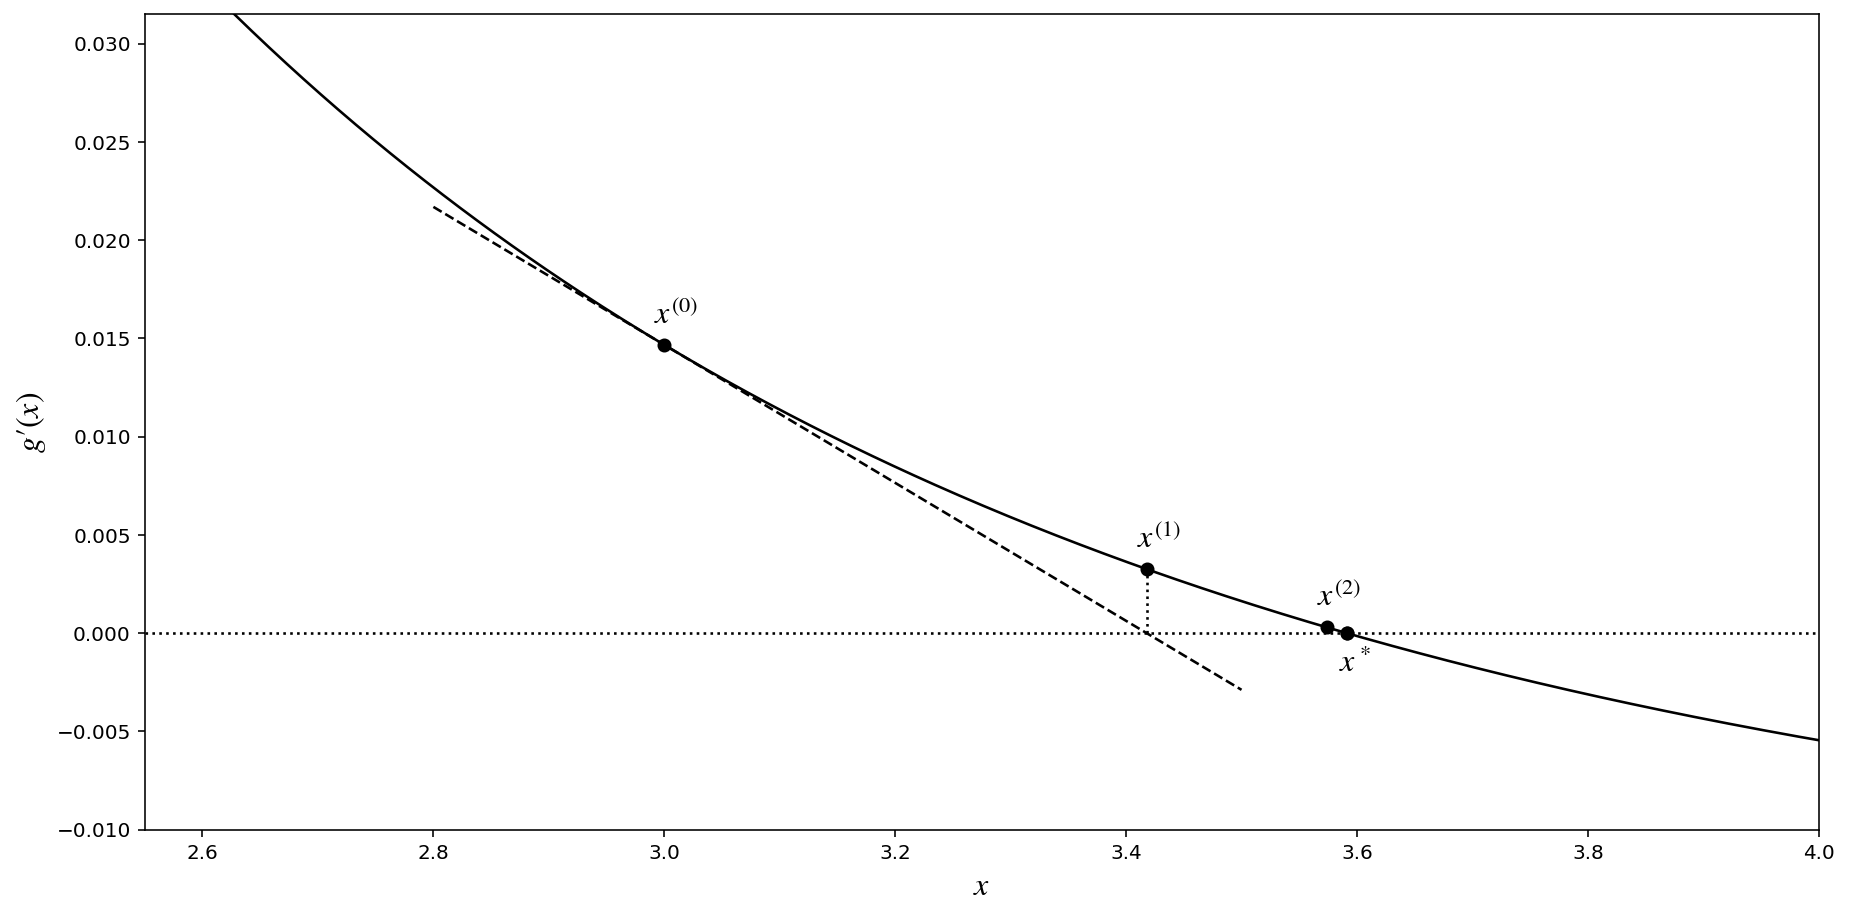

In [20]:
def has_absolute_convergence(x, tol):
    """
    Check if the end of array x has absolute convergence.
    
    Uses an absolute tolerance, tol to define when convergence has occured.
    """
    x = np.asarray(x)
    x_old = x[-2]
    x_new = x[-1]
    assert x_old != 0, "Divide by zero error"
    if np.abs(x_new - x_old) < tol:
        return True
    else:
        return False


def has_relative_convergence(x, tol=0.01 / 100, stabilize=False):
    """
    Check if the final entries in array x have relative convergence.
    
    Uses a percentage tolerance to define when convergence has occured. Can be
    stabilized to avoid overflow errors when the values of x near zero.
    """
    x = np.asarray(x)
    x_old = x[-2]
    x_new = x[-1]
    if not stabilize:
        assert np.abs(x_old) != 0, "Divide by zero error"
        if (np.abs(x_new - x_old) / np.abs(x_old) < tol):
            return True
        else:
            return False
    else:
        assert np.abs(x_old) + tol != 0, "Divide by zero error"
        if (np.abs(x_new - x_old) / (np.abs(x_old) + tol) < tol):
            return True
        else:
            return False

# Run the first update to populate an array long enough for our functions. Then
# run the Newton-Raphson iterations with relative convergence criterion.
x_guess = np.array([x_init_guess, update_guess(x_init_guess)])
while not has_relative_convergence(x_guess):
    x_guess = np.append(x_guess, update_guess(x_guess[-1]))

# Produce an array of g'(x) values
dydx_guess = get_dydx(x_guess)

# Create the tangent line for plotting
tangent_x = np.asarray([2.8, 3.5])
tangent_dydx = get_tangent_line(x_guess[1], x_guess[0], tangent_x)

# Make the plot
fnt_sz = 16
newt_fig = plt.figure()
newt_ax = newt_fig.add_subplot(1, 1, 1)
newt_ax.plot(x, dydx)
newt_ax.plot(x_guess, dydx_guess, marker='.', linestyle='')
newt_ax.axhline(0, linestyle=':')
newt_ax.plot(tangent_x, tangent_dydx, '--')
newt_ax.plot((x_guess[1], x_guess[1]), (0, dydx_guess[1]), ':')
newt_ax.set_xlabel(r'$x$', fontsize=fnt_sz)
newt_ax.set_ylabel(r"$g\prime(x)$", fontsize=fnt_sz)
newt_ax.set_xlim((2.55, 4.0))
newt_ax.set_ylim([-0.01, 0.03 * 1.05])

# Make the plot prettier
fnt_sz = 16
lin_wid = 1.3
mrk_sz = 12

for idx in range(3):
    guess_str = '$x^{{({:d})}}$'.format(idx)
    plt.annotate(guess_str,
                 xy=(x_guess[idx], dydx_guess[idx]),
                 textcoords='offset points',
                 xytext=(6, 15),
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=fnt_sz)

plt.annotate(r'$x^*$',
             xy=(x_guess[-1], dydx_guess[-1]),
             textcoords='offset points',
             xytext=(4, -15),
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=fnt_sz)

for newt_fig in (newt_fig, ):
    for newt_ax in newt_fig.axes:
        for lin in newt_ax.lines:
            lin.set_color('k')
            lin.set_linewidth(lin_wid)
            lin.set_markersize(mrk_sz)


  ## Problem 2

  ---

  Problem 2.2 on page 54 of the *Comuptational Statistics* book.

  Consider the density $f(x) = [1 - \cos\{x - \theta\}]/2\pi$ on $0 \leq x \leq
  2 \pi$, where $\theta$ is a parameter between $-\pi$ and $\pi$. The following
  i.i.d. data arise from this density: 3.91, 4.85, 2.28, 4.06, 3.70, 4.04,
  5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52,
  2.50. We wish to estimate $\theta$.

  1. Graph the log likelihood function between $-\pi$ and $\pi$.
  1. Find the method-of-moments estimator of $\theta$.
  1. Find the MLE for $\theta$ using the Newton-Raphson method, using the
     result from (2) as the starting value. What solutions do you find when you
     start at -2.7 and 2.7?
  1. Repeat part (3) using 200 equally spaced starting values between $-\pi$
     and $\pi$ into sets of attraction. In other words, divide the set of
     starting values into separate groups, with each group corresponding to a
     separate unique coutcome of the optimization (a local mode). Discuss your
     results.
  1. Find two starting values, as nearly equal as you can, for which the
     Newton-Raphson method converges to two different solutions.

 <br>
 <br>

 ### Graph of the log-likelihood function
 1. Graph the log likelihood function between $-\pi$ and $\pi$.

 Our log-likelihood function is

 $$
 l(\theta) =
 \sum_{i=1}^n \log
 \left(
   \frac{
     1 - \cos \left(
       x_i - \theta
     \right)
   }
   {
     2 \pi
   }
 \right)
 $$

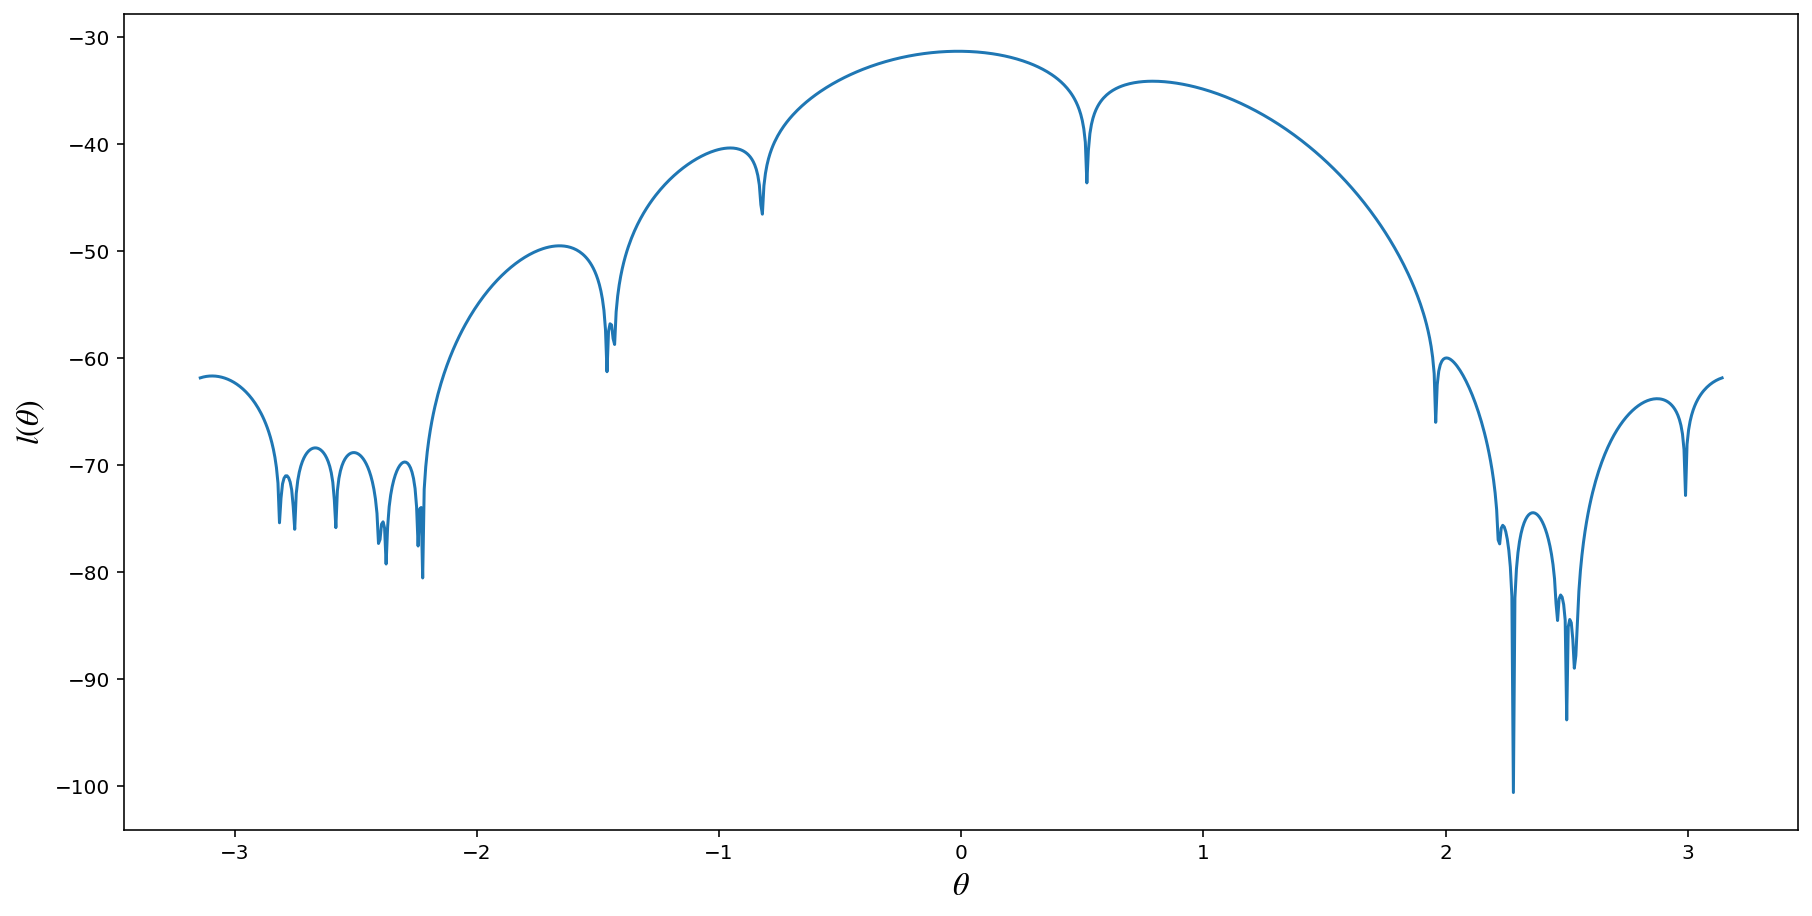

In [21]:
def log_like(x, theta_ary):
    """
    Calculate the log-likelihood function using sample x and parameter theta.
    
    x: the sample from the distribution
    theta_ary: a range of parameter values
    """
    x = np.array(x)
    assert np.all(x) > 0, "Passed a non-positive value to logarithm."
    l_like = np.full_like(theta_ary, np.nan)
    for elem, theta in zip(np.arange(theta_ary.size), theta_ary):
        assert np.all(np.cos(x - theta) != 1), "Negative logarithm input error"
        l_like[elem] = np.log((1 - np.cos(x - theta)) / 2 / np.pi).sum()
    return l_like


# Collect our sample values into an array
x = np.array([3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53,
              3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50])

# Define our plot domain and response
theta = np.linspace(-np.pi, np.pi, int(1e3))
l_like = log_like(x, theta)

# Create the initial figure
ll_fig = plt.figure()
ll_ax = ll_fig.add_subplot(1, 1, 1)
ll_ax.plot(theta, l_like)
ll_ax.set_xlabel(r'$\theta$', fontsize=fnt_sz)
ll_ax.set_ylabel(r'$l(\theta)$', fontsize=fnt_sz);


 <br>
 <br>

 ### Method-of-moments estimator of $\theta$
 2. Find the method-of-moments estimator of $\theta$.

 The MoM estimator can be found by setting the sample mean equal to the population mean

 $$
 \bar{x} =
 \frac{
   1
 }{
   2 \pi
 } \int_{0}^{2 \pi} x - x \cos \left( x - \theta \right)\, \textrm{d}x
 $$

 which, through the use of integration-by-parts and odd/even trigonometric identities results in

 $$
 \bar{x} = \pi + \sin (\theta )
 $$

 Resulting in a MoM estimator of

 $$
 \therefore \theta = \arcsin (\bar{x} - \pi)
 $$


In [22]:
# Calculate the initial guess
theta_init_guess = np.arcsin(x.mean() - np.pi)
print(f'Initial guess = {theta_init_guess}')


Initial guess = 0.05844060614042408


 <br>
 <br>

 ### Maximum likelihood estimate for $\theta$ using the Newton-Raphson method
 3. Find the MLE for $\theta$ using the Newton-Raphson method, using the
    result from (2) as the starting value. What solutions do you find when you
    start at -2.7 and 2.7?

In [23]:
def l(theta, x):
    """ Calculate the likelihood."""
    theta = np.asarray(theta)
    x = np.asarray(x)
    assert np.all(np.cos(x - theta) != 1), "Negative logarithm input error"
    return log((1 - np.cos(x - theta)) / 2 / np.pi).sum()

def l_prime(theta, x):
    """ Calculate the first derivative value of the likelihood."""
    theta = np.asarray(theta)
    x = np.asarray(x)
    num = -np.sin(x - theta)
    den = 1 - np.cos(x - theta)
    assert np.any(den != 0), "Divide by zero error."
    return (num / den).sum()

def l_prime_prime(theta, x):
    """ Calculate the second derivative value of the likelihood."""
    theta = np.asarray(theta)
    x = np.asarray(x)
    num = -1
    den = 1 - np.cos(x - theta)
    assert np.any(den != 0), "Divide by zero error."
    return (num / den).sum()

def update_guess(theta, x):
    """Calculate the new value of theta using the Newton-Raphson Update."""
    theta = np.asarray(theta)
    x = np.asarray(x)
    theta_new = theta - l_prime(theta, x) / l_prime_prime(theta, x)
    return theta_new

def newton_raphson(init_guess, x):
    """
    Perform Newton-Raphson iteration using relative convergence criterion.
    """
    x = np.asarray(x)
    init_guess = np.asarray(init_guess)
    guess = np.array([init_guess, update_guess(init_guess, x)])
    while not has_relative_convergence(guess):
        guess = np.append(guess, update_guess(guess[-1], x))
    return (guess, log_like(x, guess))

def print_newt_result(guess, x):
    """ Print the result of Newton-Raphson optimization."""
    theta_guess, log_like_guess = newton_raphson(guess, x)
    theta_final = theta_guess[-1]
    log_like_final = log_like_guess[-1]
    str1 = f'When starting at {guess}:\n   optimal theta = {theta_final:.5f}\n'
    str2 = f'   maximum log-likelihood = {log_like_final:.5f}'
    print(str1 + str2)
    print('')
    
# Calculate the values
print_newt_result(theta_init_guess, x)
print_newt_result(-2.7, x)
print_newt_result(2.7, x)


When starting at 0.05844060614042408:
   optimal theta = -0.01197
   maximum log-likelihood = -31.34291

When starting at -2.7:
   optimal theta = -2.66670
   maximum log-likelihood = -68.39919

When starting at 2.7:
   optimal theta = 2.87309
   maximum log-likelihood = -63.80565



 <br>
 <br>

 ### Local maxima using sets of attraction
 1. Repeat part (3) using 200 equally spaced starting values between $-\pi$
    and $\pi$ into sets of attraction. In other words, divide the set of
    starting values into separate groups, with each group corresponding to a
    separate unique coutcome of the optimization (a local mode). Discuss your
    results.

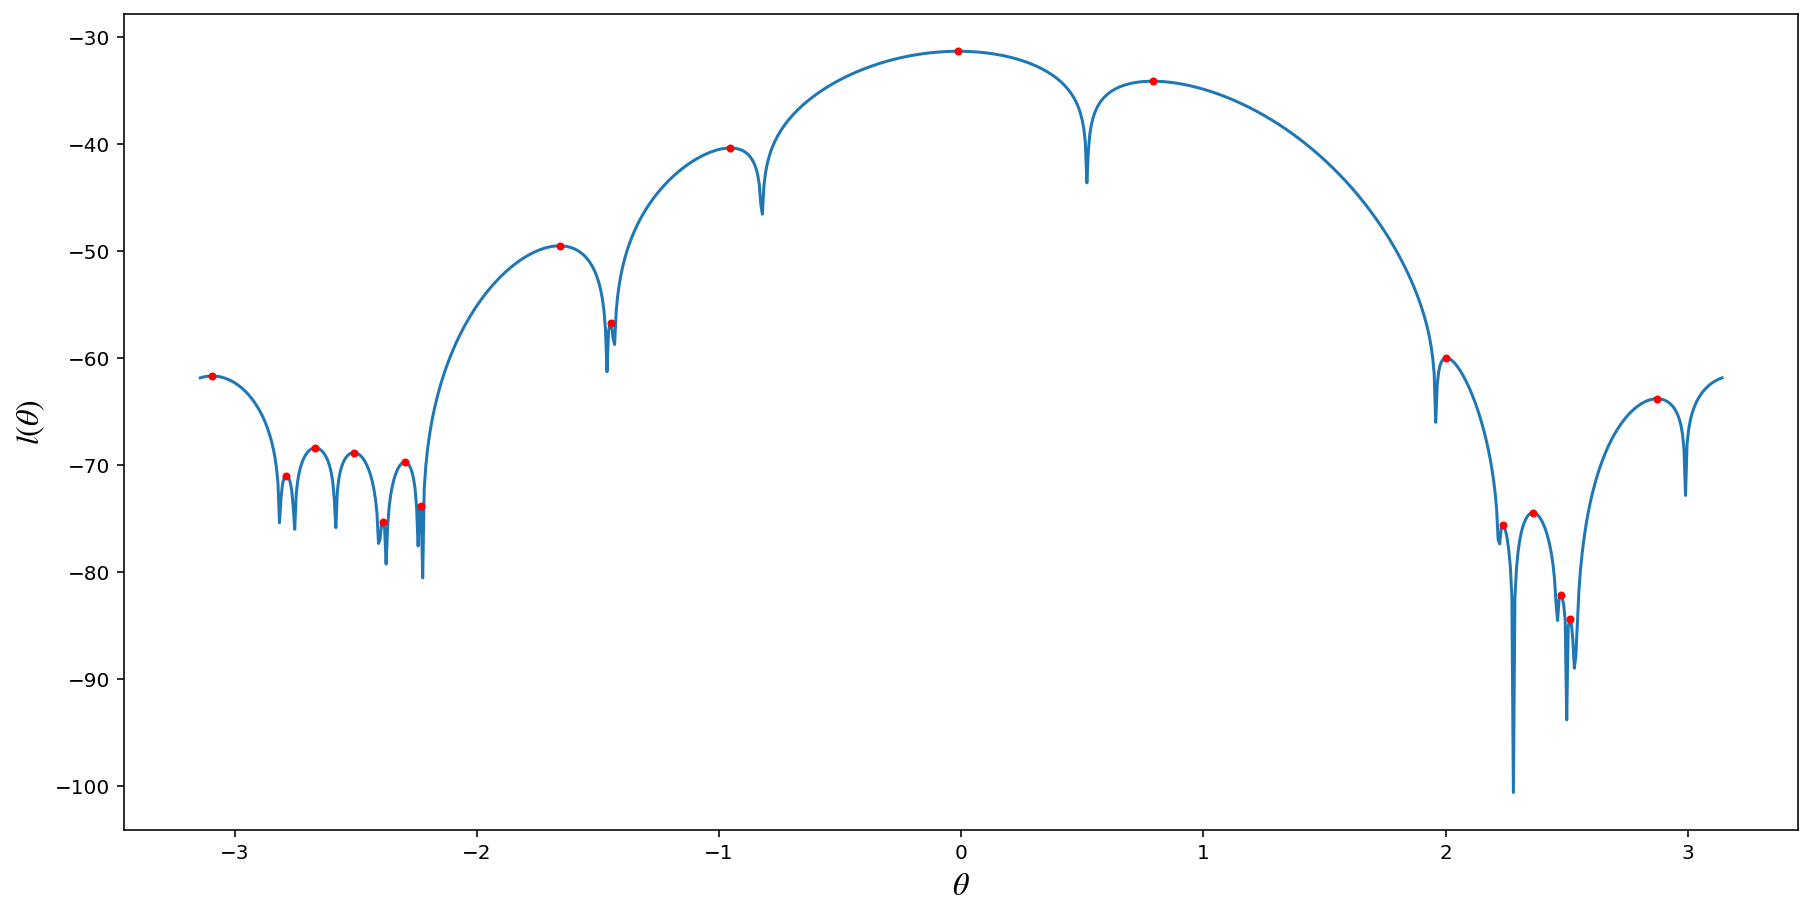

In [24]:
# Initialize arrays to hold our starting values, and the optimal inputs and
# outputs
init_guess_ary = np.linspace(-np.pi, np.pi, 200)
theta_guess = np.full_like(init_guess_ary, np.nan)
log_like_guess = theta_guess.copy()

# Calculate our 200 optimal solutions
for init_guess, idx in zip(init_guess_ary, np.arange(len(init_guess_ary))):
    th, ll = newton_raphson(init_guess, x)
    theta_guess[idx] = th[-1]
    log_like_guess[idx] = ll[-1]
    
# Separate out the unique solutions using the previously used tolerance 
# (from an earlier function default)
searchTol = 0.01 / 100
delta = np.diff(theta_guess)
is_max = (np.abs(delta) / np.abs(theta_guess[0:-1])) > searchTol
local_max_idx = np.where(is_max)[0]

# Add the new local maximums to the plot
# Lame work-around to update a figure
ll_fig = plt.figure()
ll_ax = ll_fig.add_subplot(1, 1, 1)
ll_ax.plot(theta, l_like)
ll_ax.set_xlabel(r'$\theta$', fontsize=fnt_sz)
ll_ax.set_ylabel(r'$l(\theta)$', fontsize=fnt_sz);
ll_ax.plot(theta_guess[local_max_idx], log_like_guess[local_max_idx], 'r.');


 All of our local maxima are accounted for, so I guess I can say that's excellent. Using the terminology 'local mode' seems questionable within the continuous number line, and especially questionable when finite precision is used.

 > **Note**: Being forced to copy-paste all that code from above to update this plot is one of the **many**, **many** reasons jupyter encourages the authoring of unmaintainable code.

 <br>
 <br>

 ### Find two nearly equal values of $\theta$ which diverge
 5. Find two starting values, as nearly equal as you can, for which the
    Newton-Raphson method converges to two different solutions.

When starting at -2.374276730190484:
   optimal theta = -2.38820
   maximum log-likelihood = -75.29170

When starting at -2.367987255408523:
   optimal theta = -2.29726
   maximum log-likelihood = -69.71942

With a difference of 6.289e-03 between initial guesses, this delta represented
   0.1001% of the plotted domain.


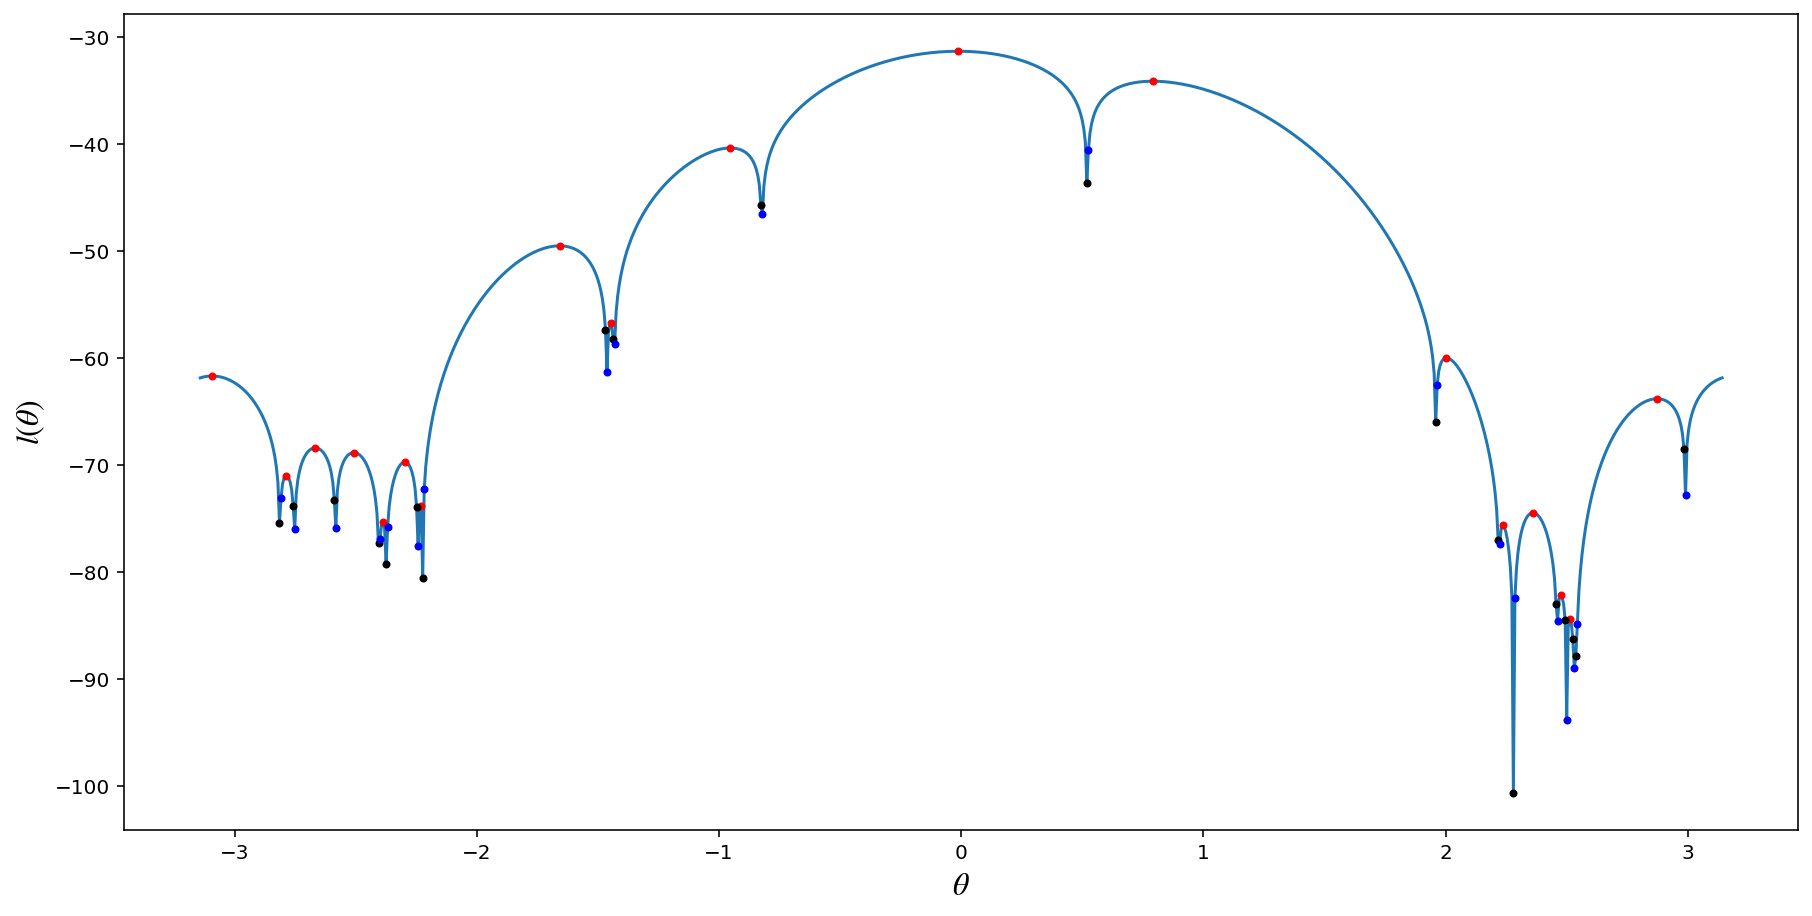

In [25]:
def is_valley(theta, x, side='left'):
    valley_array = np.full_like(theta, False)
    for idx in range(1, len(theta)):
        lp = l_prime(theta[idx], x)
        lp_prev = l_prime(theta[idx - 1], x)
        if (lp > 0) & (lp * lp_prev < 0):
            if side.lower() == 'left':
                valley_array[idx - 1] = True
            elif side.lower() == 'right':
                valley_array[idx] = True
            else:
                raise Exception(f'Parameter side={side} was not understood.')
    return valley_array.astype(bool)


is_left_valley = is_valley(theta, x)
is_right_valley = is_valley(theta, x, side='right')


closest_idx = (theta[is_right_valley] - theta[is_left_valley]).argmin()
rit_theta = theta[is_right_valley][closest_idx]
lft_theta = theta[is_left_valley][closest_idx]

# Print out the values
print_newt_result(lft_theta, x)
print_newt_result(rit_theta, x)

# Check how close the initial guesses were
theta_delta = np.abs(rit_theta - lft_theta)
prcnt_of_domain = theta_delta / np.ptp(theta) * 100
print(f'With a difference of {theta_delta:.3e} between initial guesses, '
      + f'this delta represented\n   {prcnt_of_domain:.5}% of the plotted domain.')

# Add the left and right points to the plot
# Lame work-around to update a figure
ll_fig = plt.figure()
ll_ax = ll_fig.add_subplot(1, 1, 1)
ll_ax.plot(theta, l_like)
ll_ax.set_xlabel(r'$\theta$', fontsize=fnt_sz)
ll_ax.set_ylabel(r'$l(\theta)$', fontsize=fnt_sz);
ll_ax.plot(theta_guess[local_max_idx], log_like_guess[local_max_idx], 'r.')
ll_ax.plot(theta[is_left_valley], l_like[is_left_valley], 'k.')
ll_ax.plot(theta[is_right_valley], l_like[is_right_valley], 'b.')
plt.show()


 <br>
 <br>

 ## Problem 3

 ---

 Let $X_1, \dots, X_n$ be a random sample from the Bernoulli($p$) distribution. Find the Fisher information $I(p)$.

 Forming the likelihood function, we have

 \begin{align}
 L(p) &= \prod_{i=1}^n f(x_i | p) \\
      &= \prod_{i=1}^n p^{x_i} (1 - p)^{1 - x_i} \\
 \therefore L(p) &= p^{\sum_{i=1}^n x} (1 - p)^{\sum_{i=1}^n 1 - x_i}.
 \end{align}

 Taking the logarithm, we have

 \begin{align}
 l(p) &= \log \left( p^{\sum_{i=1}^n x_i} \right) + \log \left( (1 - p)^{\sum_{i=1}^n 1 - x_i} \right) \\
      &= \log(p) \sum_{i = 1}^{n} x_i + \log(1 - p) \sum_{i = 1}^{n} \left(1 - x_i \right) \\
 \therefore l(p) &= \log(p) \sum_{i = 1}^{n} x_i + \log(1 - p) \left( n - \sum_{i = 1}^{n} x_i \right).
 \end{align}

 Twice differentiating:
 \begin{align}
 \frac{\textrm{d}\,l}{\textrm{d}p} &= p^{-1} \sum_{i=1}^{n} x_i - (1 - p)^{-1} \left(n - \sum_{i=1}^{n} x_i \right),
 \end{align}

 and

 \begin{align}
 \frac{\textrm{d}^2\,l}{\textrm{d}p^2} &= -p^{-2} \sum_{i=1}^n x_i - (1 - p)^{-2} \left( n - \sum_{i=1}^n x_i \right) \\
 \therefore \frac{\textrm{d}^2\,l}{\textrm{d}p^2} &= -\left(
                                                    \frac{\sum_{i=1}^n x_i}{p^2}
                                                    +
                                                    \frac{n - \sum_{i=1}^n x_i}{(1 - p)^2}
                                                    \right).
 \end{align}

 The Fisher information is calculated by
 \begin{align}
 I(p) &= -E_X \left( l^{\prime \prime}(p) \right) \\
      &= E \left( \frac{ \sum_{i=1}^n X_i }{ p^2 }  \right)
       + E \left( \frac{ n - \sum_{i=1}^n X_i }{ (1-p)^2 } \right) \\
      &= p^{-2} E \left( \sum_{i=1}^n X_i \right) + (1 - p)^{-2} \left[ E(n) - E \left (\sum_{i=1}^n X_i \right) \right] \\
      &= p^{-2} \sum_{i=1} E(X_i) + (1 - p)^{-2} \left( n - \sum_{i=1}^n E(X_i) \right).
 \end{align}

 Noting that $E(X) = p$ for the Bernoulli distribution, we have

 \begin{align}
 I(p) &= p^{-2} n p + (1 - p)^{-2} (n - np) \\
      &= \frac{n}{p} + \frac{n(1 - p)}{1 - p}^2 \\
      &= \frac{n(1 - p) + np}{p(1 - p)} \\
 \therefore I(p) &= \frac{ n }{ p (1 - p) }.
 \end{align}

 <br>
 <br>

 ## Problem 4

 ---

 Let $\{(X_i, Y_i)\}, i = 1, \dots , n$ be a random sample from the joint density

 $$
 f(x, y | \theta) = e^{-\left( \theta x + \frac{y}{\theta} \right)}, \quad x > 0,\  y > 0.
 $$ Find the Fisher information $I(\theta)$.

 Performing the same steps as in Problem 4, we have

 \begin{equation}
 l(\theta) = - \left( \theta \sum_i x_i + \frac{1}{\theta} \sum_i y_i \right),
 \end{equation}

 \begin{equation}
 \frac{\textrm{d}l}{\textrm{d}\theta} = \frac{1}{\theta^2} \sum_i y_i - \sum_i x_i,
 \end{equation}

 and

 \begin{equation}
 \frac{\textrm{d}^2l}{\textrm{d}\theta^2} = -2 \theta^{-3} \sum_i y_i.
 \end{equation}

 Where things begin to look different is when we take the expectation. We'll have to do a double integral because of the joint distribution. Calculating the Fisher information we have

 \begin{align}
 I(\theta | X, Y) &= -E_{X,Y} \left( \frac{-2}{\theta^3} \sum_i Y_i \right) \\
                  &= \frac{2}{\theta^3} \sum_i E_{X,Y}(Y_i).
 \end{align}

 Calculating just the expectation of a single random variable $Y$, we have

 \begin{align}
 E(Y) &= \iint y f(x, y)\ \textrm{d}x\ \textrm{d}y \\
      &= \iint_{S_{X,Y}} y e^{-\left(\theta x + \frac{y}{\theta} \right) }\ \textrm{d}x\ \textrm{d}y \\
      &= \int_{y=0}^\infty y e^{-\frac{y}{\theta}} \left( \int_{x=0}^\infty e^{-\theta x}\ \textrm{d}x \right)\ \textrm{d}y \\
      &= \frac{1}{\theta} \int_{y=0}^\infty y e^{-\frac{y}{\theta}} \textrm{d}y \\
 &= \frac{1}{\theta}\left(
                    \left[ -\theta y e^{-y / \theta} \right]_{y=0}^\infty
                     + \theta \int_0^\infty e^{-y / \theta } \ \textrm{d} y
                    \right) \\
 &= \frac{1}{\theta}\left(
                    \left[ -\theta y e^{-y \theta}
                    - \theta^2 e^{-y / \theta}
                    \right]_{y=0}^\infty
                    \right) \\
 &= \left[
    y e^{-y/\theta} + \theta e^{-y/\theta}
    \right]_{y=0}^\infty \\
 &= \left[
    (y + \theta) e^{-y / \theta}
    \right]_{y=0}^\infty \\
 &= \theta (1) - 0 \\
 \therefore E(Y) &= \theta
 \end{align}

 Substituting this result into the Fisher information, we conclude that

 \begin{align}
 I(\theta | X, Y) &= \frac{2}{\theta^3} \sum_{i=1}^n E_{X,Y}(Y_i) \\
                  &= \frac{2}{\theta^3} \sum_{i=1}^n \theta \\
                  &= \frac{2}{\theta^3} n\theta \\
 \therefore I(\theta | X, Y) &= \frac{2n}{\theta^2}
 \end{align}